In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0               Player   Nation    Pos  \
0              0    Maximilian Arnold   de GER     MF   
1              1      Nathaniel Clyne  eng ENG     DF   
2              2      Trevoh Chalobah  eng ENG     DF   
3              3       Atakan Karazor   de GER     MF   
4              4           Saša Lukić   rs SRB     MF   
...          ...                  ...      ...    ...   
1491        2490  Filippo Terracciano   it ITA  DF,FW   
1492        2495       Jonathan Viera   es ESP     MF   
1493        2496       Alan Virginius   fr FRA     FW   
1494        2505       Bryan Zaragoza   es ESP  FW,MF   
1495        2507         Nadir Zortea   it ITA     DF   

                            Squad  \
0                       Wolfsburg   
1                  Crystal Palace   
2                 Chelsea+Lorient   
3                       Stuttgart   
4     Fulham+Fulham+Torino+Torino   
...                           ...   
1491          Hellas Verona+Milan   
1492           Las Palmas+Almería   
1493          Lille+Clermont Foot   
1494        Granada+Bayern Munich   
1495           Frosinone+Atalanta   

                                                   Comp  Age    Born     MP  \
0                                         de Bundesliga  0.0  1994.0  126.0   
1                                    eng Premier League  0.0  1991.0   70.0   
2                         eng Premier League+fr Ligue 1  0.0  1999.0   87.0   
3                                         de Bundesliga  0.0  1996.0  105.0   
4     eng Premier League+eng Premier League+it Serie...  0.0  1996.0  119.0   
...                                                 ...  ...     ...    ...   
1491                                         it Serie A  0.0  2003.0   21.0   
1492                                         es La Liga  0.0  1989.0   21.0   
1493                                         fr Ligue 1  0.0  2003.0   16.0   
1494                           es La Liga+de Bundesliga  0.0  2001.0   28.0   
1495                                         it Serie A  0.0  1999.0   19.0   

      Starts    Min    90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
0      123.0  10852  120.5         0.11       0.22        0.09          0.19   
1       61.0   5474   60.8         0.00       0.03        0.00          0.03   
2       69.0   6246   69.5         0.09       0.13        0.09          0.13   
3       86.0   7520   83.5         0.00       0.07        0.00          0.07   
4       88.0   7817   86.9         0.13       0.17        0.08          0.13   
...      ...    ...    ...          ...        ...         ...           ...   
1491    15.0   1372   15.2         0.00       0.07        0.00          0.07   
1492    19.0   1529   17.0         0.12       0.35        0.00          0.24   
1493    13.0   1005   11.2         0.00       0.18        0.00          0.18   
1494    19.0   1821   20.2         0.30       0.40        0.25          0.35   
1495    14.0   1407   15.7         0.13       0.45        0.13          0.45   

      xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0         0.08          0.23        0.05            0.20                61.0   
1         0.01          0.04        0.01            0.04                40.0   
2         0.05          0.07        0.05            0.07                76.0   
3         0.02          0.08        0.02            0.07                85.0   
4         0.11          0.19        0.08            0.16                95.0   
...        ...           ...         ...             ...                 ...   
1491      0.02          0.02        0.02            0.02                31.0   
1492      0.21          0.59        0.12            0.36                41.0   
1493      0.12          0.15        0.12            0.15                24.0   
1494      0.21          0.32        0.17            0.27               145.0   
1495      0.03          0.19        0.03            0.19                52.0   

     

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

Unnamed: 0             Player   Nation    Pos                  Squad  \
0              0         Max Aarons  eng ENG     DF            Bournemouth   
1              1   Brenden Aaronson   us USA  MF,FW           Union Berlin   
2              4   Yunis Abdelhamid   ma MAR     DF                  Reims   
3              5  Salis Abdul Samed   gh GHA     MF                   Lens   
4              7    Laurent Abergel   fr FRA     MF                Lorient   
...          ...                ...      ...    ...                    ...   
1493         134  Alessandro Zanoli   it ITA  DF,FW     Salernitana+Napoli   
1494         135       Duván Zapata   co COL     FW        Torino+Atalanta   
1495         136     Bryan Zaragoza   es ESP  FW,MF  Granada+Bayern Munich   
1496         138       Nadir Zortea   it ITA     DF     Frosinone+Atalanta   
1497         139        Milan Đurić   ba BIH     FW    Hellas Verona+Monza   

                          Comp  Age    Born  MP  Starts   Min   90s  \
0           eng Premier League  0.0  2000.0  20      13  1237  13.7   
1                de Bundesliga  0.0  2000.0  30      14  1267  14.1   
2                   fr Ligue 1  0.0  1987.0  31      31  2781  30.9   
3                   fr Ligue 1  0.0  2000.0  27      17  1519  16.9   
4                   fr Ligue 1  0.0  1993.0  33      32  2860  31.8   
...                        ...  ...     ...  ..     ...   ...   ...   
1493                it Serie A  0.0  2000.0  21      10   973  10.8   
1494                it Serie A  0.0  1991.0  37      36  2992  33.2   
1495  es La Liga+de Bundesliga  0.0  2001.0  28      19  1821  20.2   
1496                it Serie A  0.0  1999.0  19      14  1407  15.7   
1497                it Serie A  0.0  1990.0  37      26  2461  27.4   

      Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  \
0            0.00       0.07        0.00          0.07      0.00   
1            0.14       0.28        0.14          0.28      0.14   
2            0.13       0.13        0.10          0.10      0.11   
3            0.00       0.00        0.00          0.00      0.05   
4            0.06       0.09        0.06          0.09      0.04   
...           ...        ...         ...           ...       ...   
1493         0.00       0.19        0.00          0.19      0.02   
1494         0.39       0.51        0.39          0.51      0.34   
1495         0.30       0.40        0.25          0.35      0.21   
1496         0.13       0.45        0.13          0.45      0.03   
1497         0.33       0.40        0.29          0.36      0.27   

      xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0             0.06        0.00            0.06                34.0   
1             0.27        0.14            0.27                77.0   
2             0.12        0.09            0.09                15.0   
3             0.08        0.05            0.08                19.0   
4             0.10        0.04            0.10                65.0   
...            ...         ...             ...                 ...   
1493          0.02        0.02            0.02                26.0   
1494          0.44        0.34            0.44               114.0   
1495          0.32        0.17            0.27               145.0   
1496          0.19        0.03            0.19                52.0   
1497          0.39        0.19            0.21                 7.0   

      Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
0              14.0            41.2              12.0               35.3   
1              34.0            44.2              41.0               53.2   
2               8.0            53.3               7.0               46.7   
3               7.0            36.8              11.0               57.9   
4              44.0            67.7              18.0               27.7   
...             ...             ...               ...                ...   
1493            6.0       

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (MF) and defenders (DF) from the 'final_player' DataFrame
midfielder_players = final_player[final_player['Pos'].isin(['MF'])]
newbie = newbie[newbie['Pos'].isin(['MF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['MF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['MF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['MF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['MF'])]

# Reset the index if needed
midfielder_players = midfielder_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)
player_2024=player_2024.reset_index(drop=True)

In [6]:
Kroos=midfielder_players[midfielder_players['Player']=='Toni Kroos']
Kroos

Unnamed: 0      Player  Nation Pos        Squad        Comp  Age    Born  \
59         239  Toni Kroos  de GER  MF  Real Madrid  es La Liga  0.0  1990.0   

       MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
59  119.0    98.0  8499  94.4         0.07       0.34        0.07   

    G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
59          0.34      0.08          0.28        0.08            0.28   

    Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
59                69.0           39.0           56.52              23.0   

    Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
59              33.33          105.84                    2.12   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
59                   20.34                   63.03                   23.27   

    Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
59                    0.85                     105.84   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
59                       0.73                  0.41                     0.25   

    Carries_per_90  Total_Distance_per_90  \
59           69.87                 316.23   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
59                                166.4                        1.76   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
59                2.07                         0.18                0.42   

    Dispossessed_per_90  Passes_Received_per_90  \
59                 0.39                   84.82   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
59                                1.61                        4.35   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
59                     0.37                   2.64                   1.45   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
59                  0.02              0.13                     0.07   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
59                   2.64                   0.22                   0.11   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
59                   0.0              0.01                      0.0   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
59                   0.02            8548.0            9408.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
59              90.86        158998.0         54978.0            3886.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
59            4011.0              96.65             3188.0             3393.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
59               93.96           1280.0           1680.0             76.19   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
59            0.08         0.2       0.23          0.06               2.49   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
59              13.09                        1.22   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
59                         0.17                      12.24   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
59                    99.66                     89.8                     9.42   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
59                     4.95                  0.23             2.43   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
59            4.79                    0.46                  4.0   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
59                    1.36                     1.34                     0.02   

    Passes_Cmp_per_90  Passes_Of

In [7]:
Kroos_2024=player_2024[player_2024['Player']=='Toni Kroos']
Kroos_2024

Unnamed: 0      Player  Nation Pos        Squad        Comp  Age    Born  \
148        1389  Toni Kroos  de GER  MF  Real Madrid  es La Liga  0.0  1990.0   

     MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
148  33      24  2124  23.6         0.04       0.38        0.04          0.38   

     xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
148      0.07          0.28        0.07            0.28                 8.0   

     Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
148            5.0            62.5               3.0               37.5   

     Touches_per_90  Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  \
148          112.54                    2.46                   23.14   

     Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
148                   69.53                   20.85                    0.55   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
148                     112.54                       0.34   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
148                  0.21                     0.13           74.49   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
148                 339.83                                177.5   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
148                        1.36                2.16   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
148                         0.04                0.34                 0.25   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
148                   90.17                                1.23   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
148                        4.24                     0.47   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
148                   2.58                   1.44                   0.0   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
148              0.17                     0.04                    0.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
148                   0.25                   0.21                   0.0   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
148               0.0                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
148            2291.0            2505.0               91.5         42164.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
148         15443.0            1087.0            1121.0               97.0   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
148              828.0              881.0                94.0   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
148            333.0            438.0              76.0            0.34   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
148        0.21       0.25          0.13               2.63   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
148              13.86                        0.97   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
148                         0.21                      12.29   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
148                   106.14                    95.76   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
148                    10.13                     5.81                  0.25   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
148             2.25             5.0                    0.55   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
148                 3.77                    1.36                     1.44   

     Str_Corner_Kicks_per_90  Pas

In [8]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = midfielder_players[params].rank(pct=True) * 100

# Get the row of Toni Kroos' stats from the percentile ranks DataFrame
kroos_percentile_ranks = round(players_percentile_ranks.iloc[[59]],0)

# Print the percentile ranks for Toni Kroos
print(kroos_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
59         48.0       89.0        53.0          91.0      49.0          82.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
59        52.0            84.0                49.0           53.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
59            63.0              43.0               27.0           100.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
59                    47.0                    99.0                   100.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
59                    93.0                    33.0                      100.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
59                       14.0                  19.0                     14.0   

    Carries_per_90  Total_Distance_per_90  \
59           100.0     

In [9]:
# Extract the percentile ranks, transpose, and sort them in descending order
kroos_percentile_ranks_percentile_ranks_sorted = kroos_percentile_ranks.T.sort_values(by=59, ascending=False)

# Get the top 20 parameters
top_20_params = kroos_percentile_ranks_percentile_ranks_sorted.index[:30]
top_20_params_values = kroos_percentile_ranks_percentile_ranks_sorted[59].head(30)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['Carries_per_90', 'Passes_Total_Cmp', 'Passes_Long_Att',
       'Tocuhes_Live_Balls_per_90', 'Passes_Medium_Cmp',
       'Touches_Mid_3rd_per_90', 'Passes_Short_Cmp%', 'Passes_Received_per_90',
       'Touches_per_90', 'Passes_Short_Cmp', 'Passes_PrgDist',
       'Passes_1/3_per_90', 'Progressive_Passes_per_90',
       'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90',
       'Passes_Cmp_per_90', 'Free_Kick_Passes_per_90', 'Switches_per_90',
       'Passes_TotDist', 'Passes_Total_Att', 'Passes_Long_Cmp',
       'Passes_Medium_Att', 'Progressive_Distance_Carried_per_90',
       'Passes_Short_Att', 'Touches_Def_3rd_per_90', 'Dead_Ball_Passes_per_90',
       'Total_Distance_per_90', 'Passes_Medium_Cmp%', 'Passes_Total_Cmp%',
       'Corner_Kicks_per_90'],
      dtype='object')
Values:
Carries_per_90                         100.0
Passes_Total_Cmp                       100.0
Passes_Long_Att                        100.0
Tocuhes_Live_Balls_per_90              100.

In [10]:
import pandas as pd

params=['Progressive_Distance_Carried_per_90', 'Passes_TotDist',  'Passes_Total_Cmp',
        'Passes_Long_Cmp','Passes_Cmp_per_90', 'Passes_1/3_per_90',
        'Passes_Received_per_90','Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
        'Touches_per_90', 'Carries_per_90','Passes_PrgDist', 
        'Switches_per_90', 'Progressive_Carries_per_90', 'Passes_Total_Cmp%']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = midfielder_players[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
kroos_percentile_ranks = round(players_percentile_ranks.iloc[[59]],0)

# Print the percentile ranks for the player
kroos_percentile_ranks


Progressive_Distance_Carried_per_90  Passes_TotDist  Passes_Total_Cmp  \
59                                 99.0           100.0             100.0   

    Passes_Long_Cmp  Passes_Cmp_per_90  Passes_1/3_per_90  \
59            100.0              100.0              100.0   

    Passes_Received_per_90  Passes_Attempted_per_90  Touches_Mid_3rd_per_90  \
59                   100.0                    100.0                   100.0   

    Touches_per_90  Carries_per_90  Passes_PrgDist  Switches_per_90  \
59           100.0           100.0           100.0            100.0   

    Progressive_Carries_per_90  Passes_Total_Cmp%  
59                        70.0               98.0

In [11]:
kroos_percentile_ranks_list = kroos_percentile_ranks.values.flatten().tolist()

kroos_percentile_ranks_list

[99.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 70.0,
 98.0]

In [12]:
len(params)

15

In [13]:
import pandas as pd

params=['Progressive_Distance_Carried_per_90', 'Passes_TotDist',  'Passes_Total_Cmp',
        'Passes_Long_Cmp','Passes_Cmp_per_90', 'Passes_1/3_per_90',
        'Passes_Received_per_90','Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
        'Touches_per_90', 'Carries_per_90','Passes_PrgDist', 
        'Switches_per_90', 'Progressive_Carries_per_90', 'Passes_Total_Cmp%']

# Calculate percentile ranks for players in the larger DataFrame
players_2024_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
kroos_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[148]],0)

# Print the percentile ranks for the player
kroos_2024_percentile_ranks


Progressive_Distance_Carried_per_90  Passes_TotDist  Passes_Total_Cmp  \
148                                 99.0            99.0              99.0   

     Passes_Long_Cmp  Passes_Cmp_per_90  Passes_1/3_per_90  \
148             99.0              100.0              100.0   

     Passes_Received_per_90  Passes_Attempted_per_90  Touches_Mid_3rd_per_90  \
148                    99.0                    100.0                    99.0   

     Touches_per_90  Carries_per_90  Passes_PrgDist  Switches_per_90  \
148            99.0           100.0           100.0            100.0   

     Progressive_Carries_per_90  Passes_Total_Cmp%  
148                        54.0               97.0

In [14]:
kroos_2024_percentile_ranks_list = kroos_2024_percentile_ranks.values.flatten().tolist()

kroos_2024_percentile_ranks_list

[99.0,
 99.0,
 99.0,
 99.0,
 100.0,
 100.0,
 99.0,
 100.0,
 99.0,
 99.0,
 100.0,
 100.0,
 100.0,
 54.0,
 97.0]

In [15]:
image_path = "Kroos.jpg"
fdj_cropped = Image.open(image_path)


In [16]:
params=['Progressive_Distance_Carried_per_90', 'Passes_Total_Distance',  'Passes_Total_Completed',
        'Passes_Long_Completed','Passes_Completed_per_90', 'Passes_to_Final_Third_per_90',
        'Passes_Received_per_90','Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
        'Touches_per_90', 'Carries_per_90','Passes_Progressive_Distance', 
        'Switches_per_90', 'Progressive_Carries_per_90', 'Passes_Total_Completed_%']

split_params = [param.replace('_', '\n') for param in params]

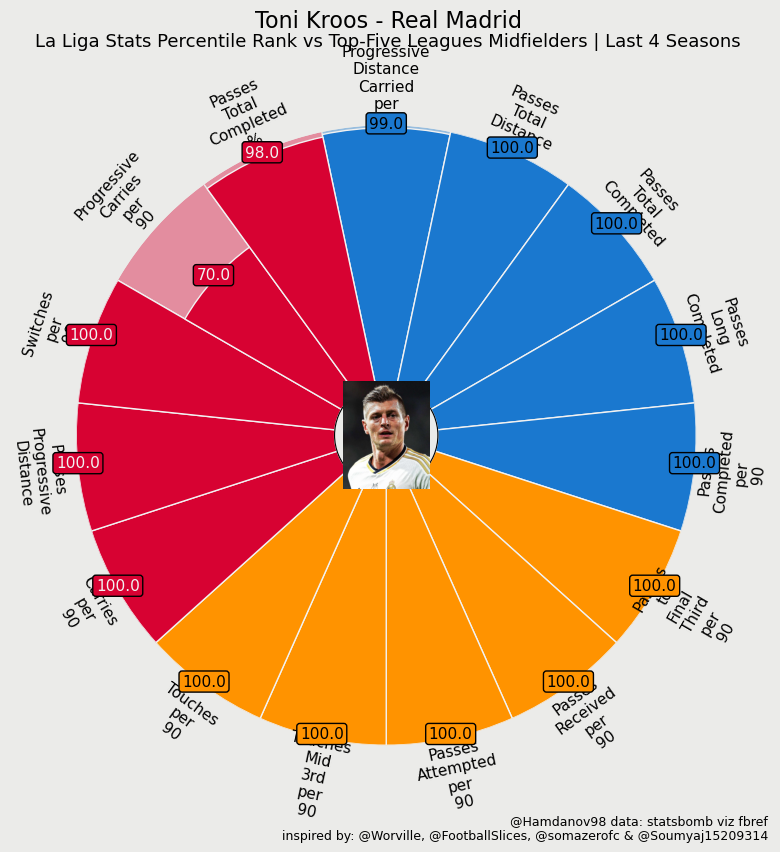

In [17]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kroos_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Toni Kroos - Real Madrid", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues Midfielders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kroos_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


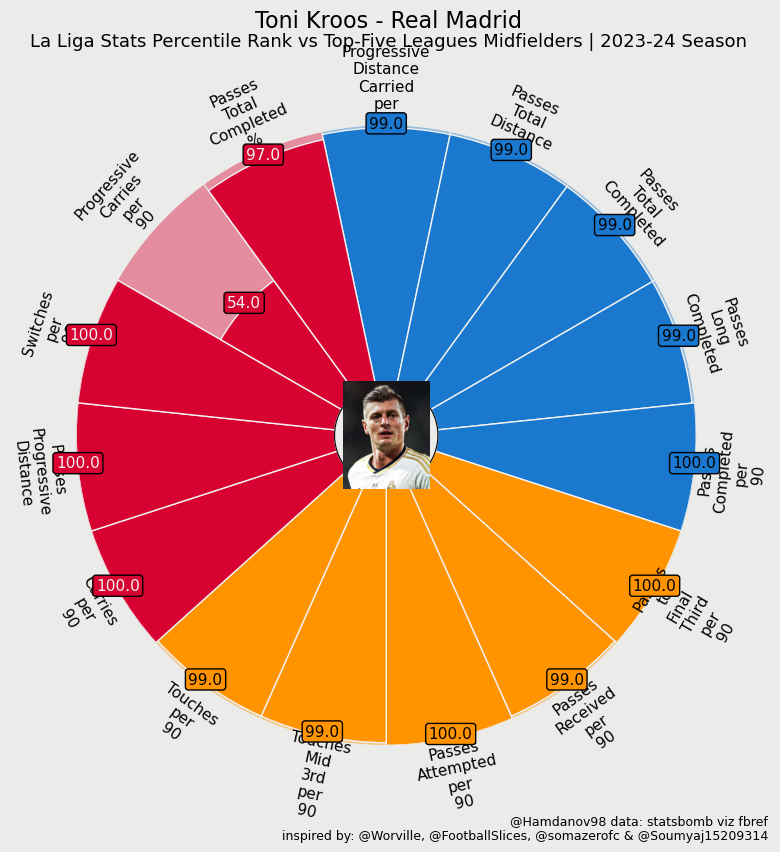

In [18]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kroos_2024_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Toni Kroos - Real Madrid", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kroos_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [19]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in midfielder_players.columns:
        midfielder_players[feature]=-midfielder_players[feature]
        player_2024[feature]=-player_2024[feature]
        

In [20]:
params=['Progressive_Distance_Carried_per_90', 'Passes_TotDist',  'Passes_Total_Cmp',
        'Passes_Long_Cmp','Passes_Cmp_per_90', 'Passes_1/3_per_90',
        'Passes_Received_per_90','Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
        'Touches_per_90', 'Carries_per_90','Passes_PrgDist', 
        'Switches_per_90', 'Progressive_Carries_per_90', 'Passes_Total_Cmp%']

In [21]:
# Normalize data
numerical_midfielder_players = midfielder_players[params].replace([np.inf, -np.inf], 0)
normalized_midfielder_players = (numerical_midfielder_players - numerical_midfielder_players.mean()) / numerical_midfielder_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_midfielder_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [22]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_midfielder_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=midfielder_players.index)

In [23]:
# Get de Ligt's row and compute cosine similarity
kroos_index = midfielder_players.index[midfielder_players['Player'] == 'Toni Kroos'][0]
kroos_data = transformed_df.loc[kroos_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=kroos_index)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, kroos_data).flatten()
transformed_df['similarity_to_kroos'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_kroos', ascending=False).index
top_similar_players = midfielder_players.loc[top_similar_players_indices]

In [25]:
# Visualize the results
midfielder_players['similarity_to_kroos'] = transformed_df['similarity_to_kroos']
midfielder_players_sorted = midfielder_players.sort_values(by='similarity_to_kroos', ascending=False)
midfielder_players_sorted

Unnamed: 0                      Player   Nation Pos  \
79          327                 Luka Modrić   hr CRO  MF   
167         677               Johan Gastien   fr FRA  MF   
55          221              Nicolò Rovella   it ITA  MF   
8            20            Fabián Ruiz Peña   es ESP  MF   
40          171                  Unai López   es ESP  MF   
36          157             Bruno Guimarães   br BRA  MF   
125         511            Hakan Çalhanoğlu   tr TUR  MF   
142         596              Nabil Bentaleb   dz ALG  MF   
108         448           Christian Eriksen   dk DEN  MF   
209         891                Aleix García   es ESP  MF   
14           49                Ivan Rakitić   hr CRO  MF   
96          399             Pierre Højbjerg   dk DEN  MF   
126         513            Manuel Locatelli   it ITA  MF   
39          169                Jordan Ferri   fr FRA  MF   
135         543              Benjamin André   fr FRA  MF   
119         499                       Rodri   es ESP  MF   
164         667                 Angel Gomes  eng ENG  MF   
75          312                Granit Xhaka   ch SUI  MF   
92          380                        Koke   es ESP  MF   
102         415             Jordan Veretout   fr FRA  MF   
111         460             Ismaël Bennacer   dz ALG  MF   
20           84             Boubacar Kamara   fr FRA  MF   
175         733             Stijn Spierings   nl NED  MF   
53          218               Nemanja Matić   rs SRB  MF   
50          206               Daniel Parejo   es ESP  MF   
200         828              Enzo Fernández   ar ARG  MF   
24          104            Pedro Chirivella   es ESP  MF   
86          349                 Declan Rice  eng ENG  MF   
132         528             Rodrigo De Paul   ar ARG  MF   
181         768            Corentin Tolisso   fr FRA  MF   
124         510         Baptiste Santamaria   fr FRA  MF   
73          307             Jude Bellingham  eng ENG  MF   
94          390              İlkay Gündoğan   de GER  MF   
69          277                Maxime Lopez   fr FRA  MF   
17           73             Frenkie de Jong   nl NED  MF   
93          383            Maxence Caqueret   fr FRA  MF   
118         498               Mateo Kovačić   hr CRO  MF   
32          135             Youssouf Fofana   fr FRA  MF   
122         506           Federico Valverde   uy URU  MF   
130         517              Nicolò Barella   it ITA  MF   
104         428           Rodrigo Bentancur   uy URU  MF   
107         447                 Enzo Le Fée   fr FRA  MF   
25          105           Pierre Lees-Melou   fr FRA  MF   
71          295               Leon Goretzka   de GER  MF   
161         660           Stanislav Lobotka   sk SVK  MF   
28          127                Luis Alberto   es ESP  MF   
26          110                 Oriol Romeu   es ESP  MF   
98          404                Remo Freuler   ch SUI  MF   
67          274                    Jorginho   it ITA  MF   
22           87               Téji Savanier   fr FRA  MF   
19           83              Xaver Schlager   at AUT  MF   
117         488             Florian Neuhaus   de GER  MF   
51          215         Alexis Mac Allister   ar ARG  MF   
103         426                      Danilo   br BRA  MF   
12           37             Laurent Abergel   fr FRA  MF   
3             9              Étienne Capoue   fr FRA  MF   
83          337           Boubakary Soumaré   fr FRA  MF   
7            15                Fran Beltrán   es ESP  MF   
88          356              Matteo Pessina   it ITA  MF   
23          101          Idrissa Gana Gueye   sn SEN  MF   
292        1707             Leandro Paredes   ar ARG  MF   
153         636            Teun Koopmeiners   nl NED  MF   
82          333               Yves Bissouma   ml MLI  MF   
166         671               Azor Matusiwa   nl NED  MF   
140         573           Exequiel Palacios   ar ARG  MF   
29          128            Mattéo Guendouzi  

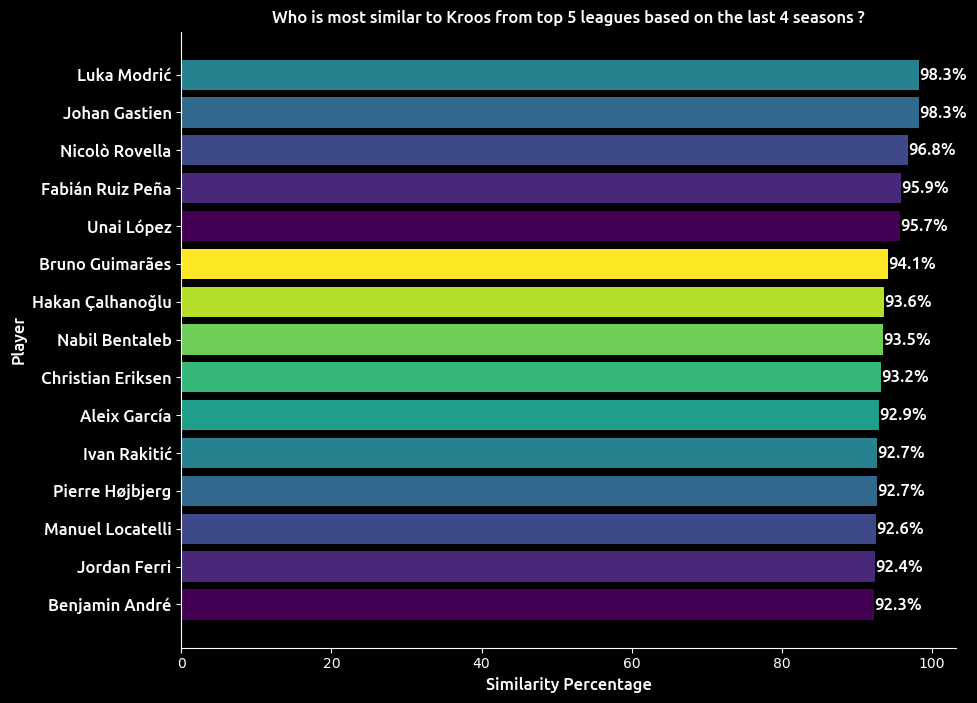

In [26]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the midfielder_players DataFrame by similarity_to_kroos in descending order
midfielder_players_sorted = midfielder_players.sort_values(by='similarity_to_kroos', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(midfielder_players_sorted['Player'].head(15)[::-1], (midfielder_players_sorted['similarity_to_kroos'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Kroos from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(midfielder_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [27]:
Rovella=midfielder_players[midfielder_players['Player']=='Nicolò Rovella']
Rovella

Unnamed: 0          Player  Nation Pos                       Squad  \
55         221  Nicolò Rovella  it ITA  MF  Lazio+Monza+Juventus+Genoa   

          Comp  Age    Born    MP  Starts   Min   90s  Goals_per90  G+A_per90  \
55  it Serie A  0.0  2001.0  92.0    65.0  5740  63.7         0.02       0.16   

    G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
55        0.02          0.16      0.06          0.12        0.06   

    npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
55            0.12                77.0           46.0           59.74   

    Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
55              29.0              37.66            76.2   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
55                    2.61                   18.87                   45.21   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
55                   13.03                    0.39                       76.2   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
55                       1.21                  0.72                     0.46   

    Carries_per_90  Total_Distance_per_90  \
55            44.3                 225.04   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
55                               102.37                        1.48   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
55                 1.3                         0.06               -1.18   

    Dispossessed_per_90  Passes_Received_per_90  \
55                -0.63                   51.72   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
55                                1.15                        17.8   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
55                     2.31                   1.66                   0.53   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
55                  0.06              0.05                     0.17   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
55                   1.66                   0.19                    0.1   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
55                   0.0               0.0                      0.0   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
55                   0.02            3551.0            4185.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
55              84.85         63884.0         16562.0            1603.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
55            1725.0               93.0             1459.0             1629.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
55               89.56            427.0            669.0             63.83   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
55            0.06         0.1       0.08          0.04               1.22   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
55                4.6                        0.61   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
55                         0.11                       4.69   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
55                     65.7                    60.54                     4.96   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
55                      2.9                  0.14             0.83   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
55            2.98                     0.3                 1.74   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
55                    0.54                     0.96                      0.0 

In [28]:
import pandas as pd

params=['Progressive_Distance_Carried_per_90', 'Passes_TotDist',  'Passes_Total_Cmp',
        'Passes_Long_Cmp','Passes_Cmp_per_90', 'Passes_1/3_per_90',
        'Passes_Received_per_90','Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
        'Touches_per_90', 'Carries_per_90','Passes_PrgDist', 
        'Switches_per_90', 'Progressive_Carries_per_90', 'Passes_Total_Cmp%']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = midfielder_players[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
rovella_percentile_ranks = round(players_percentile_ranks.iloc[[55]],0)

# Print the percentile ranks for the player
rovella_percentile_ranks


Progressive_Distance_Carried_per_90  Passes_TotDist  Passes_Total_Cmp  \
55                                 76.0            76.0              74.0   

    Passes_Long_Cmp  Passes_Cmp_per_90  Passes_1/3_per_90  \
55             84.0               88.0               66.0   

    Passes_Received_per_90  Passes_Attempted_per_90  Touches_Mid_3rd_per_90  \
55                    83.0                     89.0                    88.0   

    Touches_per_90  Carries_per_90  Passes_PrgDist  Switches_per_90  \
55            90.0            81.0            72.0             90.0   

    Progressive_Carries_per_90  Passes_Total_Cmp%  
55                        59.0               68.0

In [29]:
rovella_percentile_ranks_list = rovella_percentile_ranks.values.flatten().tolist()

rovella_percentile_ranks_list

[76.0,
 76.0,
 74.0,
 84.0,
 88.0,
 66.0,
 83.0,
 89.0,
 88.0,
 90.0,
 81.0,
 72.0,
 90.0,
 59.0,
 68.0]

In [30]:
image_path = "Rovella.png"
fdj_cropped = Image.open(image_path)


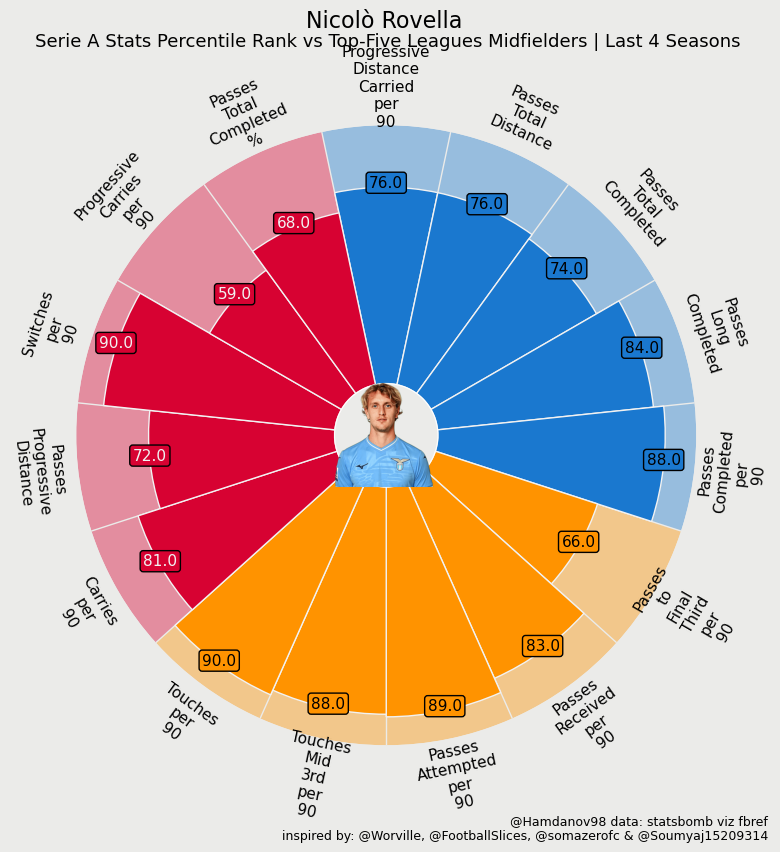

In [31]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    rovella_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Nicolò Rovella ", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues Midfielders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Rovella_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png


In [32]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [33]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [34]:
# Get de Ligt's row and compute cosine similarity
kroos_2024_index = player_2024.index[player_2024['Player'] == 'Toni Kroos'][0]
kroos_2024_data = transformed_df.loc[kroos_2024_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=kroos_2024_index)

In [35]:
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, kroos_2024_data).flatten()
transformed_df['similarity_to_kroos_2024'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_kroos_2024', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [36]:
# Visualize the results
player_2024['similarity_to_kroos_2024'] = transformed_df['similarity_to_kroos_2024']
player_2024_sorted = player_2024.sort_values(by='similarity_to_kroos_2024', ascending=False)
player_2024_sorted

Unnamed: 0                      Player   Nation Pos  \
85          866              Enzo Fernández   ar ARG  MF   
44          430            Hakan Çalhanoğlu   tr TUR  MF   
141        1351                        Koke   es ESP  MF   
162        1512                  Unai López   es ESP  MF   
9           108              Benjamin André   fr FRA  MF   
26          279              Nabil Bentaleb   dz ALG  MF   
286        2577                 Teddy Teuma   mt MLT  MF   
246        2251                       Rodri   es ESP  MF   
98          955               Johan Gastien   fr FRA  MF   
96          937                Aleix García   es ESP  MF   
198        1782                 Luka Modrić   hr CRO  MF   
16          217              Nicolò Barella   it ITA  MF   
100         990                 Angel Gomes  eng ENG  MF   
221        2040             Leandro Paredes   ar ARG  MF   
245        2248                   Marc Roca   es ESP  MF   
327          84               Nemanja Matić   rs SRB  MF   
331         117             Stijn Spierings   nl NED  MF   
2            28                 Yacine Adli   fr FRA  MF   
154        1454           Pierre Lees-Melou   fr FRA  MF   
312        2789                Granit Xhaka   ch SUI  MF   
292        2600            Corentin Tolisso   fr FRA  MF   
110        1062             Bruno Guimarães   br BRA  MF   
262        2351         Baptiste Santamaria   fr FRA  MF   
190        1717                 Arthur Melo   br BRA  MF   
1             7             Laurent Abergel   fr FRA  MF   
112        1070              İlkay Gündoğan   de GER  MF   
86          875                Jordan Ferri   fr FRA  MF   
300        2668           Federico Valverde   uy URU  MF   
123        1171             Pierre Højbjerg   dk DEN  MF   
169        1548         Alexis Mac Allister   ar ARG  MF   
265        2379              Xaver Schlager   at AUT  MF   
249        2258            Kirian Rodríguez   es ESP  MF   
333         119              Angelo Stiller   de GER  MF   
74          769                 Tommy Doyle  eng ENG  MF   
99          978               Billy Gilmour  sct SCO  MF   
68          657             Rodrigo De Paul   ar ARG  MF   
242        2225                 Declan Rice  eng ENG  MF   
158        1494            Manuel Locatelli   it ITA  MF   
53          528            Pedro Chirivella   es ESP  MF   
104        1014               Leon Goretzka   de GER  MF   
219        2022           Exequiel Palacios   ar ARG  MF   
49          456            Maxence Caqueret   fr FRA  MF   
41          422              Moisés Caicedo   ec ECU  MF   
87          888             Youssouf Fofana   fr FRA  MF   
222        2041               Daniel Parejo   es ESP  MF   
166        1531                Douglas Luiz   br BRA  MF   
263        2365               Téji Savanier   fr FRA  MF   
266        2385              Niklas Schmidt   de GER  MF   
30          313               Yves Bissouma   ml MLI  MF   
130        1244             Frenkie de Jong   nl NED  MF   
315        2835             Piotr Zieliński   pl POL  MF   
229        2106              Matteo Pessina   it ITA  MF   
157        1493           Stanislav Lobotka   sk SVK  MF   
77          795                     Éderson   br BRA  MF   
11          139           Maximilian Arnold   de GER  MF   
235        2179                Ivan Rakitić   hr CRO  MF   
185        1634                Jonas Martin   fr FRA  MF   
224        2056         Aleksandar Pavlovic   de GER  MF   
270        2424              Vincent Sierro   ch SUI  MF   
284        2540          Dominik Szoboszlai   hu HUN  MF   
301        2676       José Luis García Vayá   es ESP  MF   
17          219                Ross Barkley  eng ENG  MF   
153        1445                 Enzo Le Fée   fr FRA  MF   
142        1359          Geoffrey Kondogbia   cf CTA  MF   
298        2650       Manuel Ugarte Ribeiro   uy URU  MF   
170        1551              James Maddison  

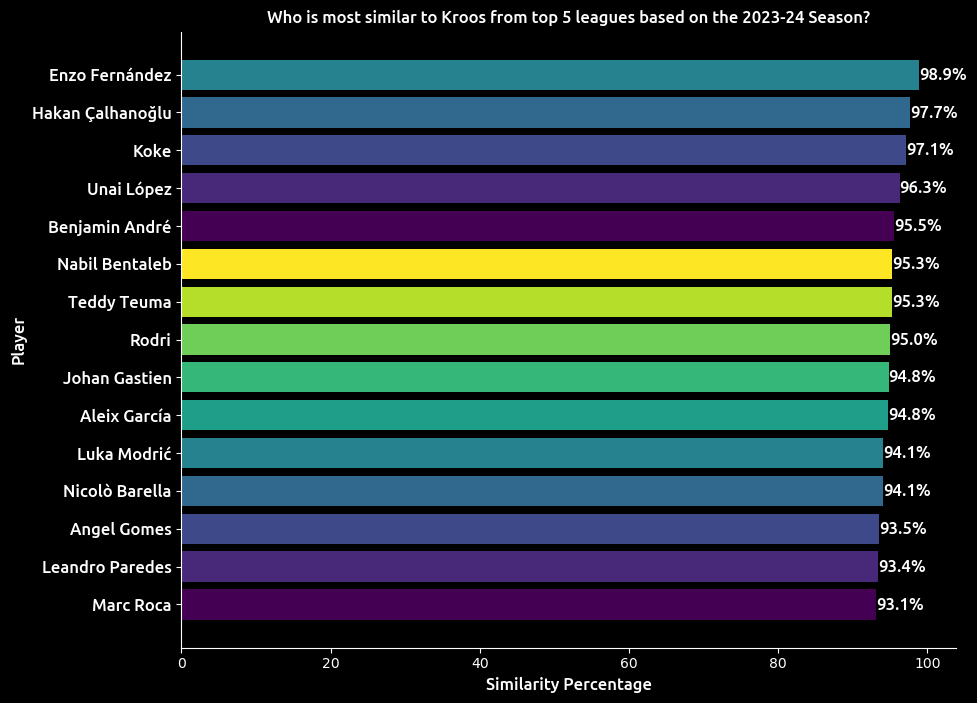

In [37]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_kroos_2024 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_kroos_2024', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_kroos_2024'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Kroos from top 5 leagues based on the 2023-24 Season?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [38]:
Lopez=player_2024[player_2024['Player']=='Unai López']
Lopez

Unnamed: 0      Player  Nation Pos           Squad        Comp  Age  \
162        1512  Unai López  es ESP  MF  Rayo Vallecano  es La Liga  0.0   

       Born  MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
162  1995.0  35      28  2108  23.4         0.04       0.13        0.04   

     G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
162          0.13      0.05          0.16        0.05            0.16   

     Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
162                39.0           22.0            56.4              17.0   

     Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
162               43.6           71.58                     1.5   

     Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
162                   14.53                   41.88                   15.85   

     Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
162                    0.68                      71.58   

     Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
162                       1.67                  0.94                     0.73   

     Carries_per_90  Total_Distance_per_90  \
162           37.86                 178.08   

     Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
162                                83.93                        1.37   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
162                1.03                         0.09               -1.11   

     Dispossessed_per_90  Passes_Received_per_90  \
162                -0.98                   48.21   

     Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
162                                2.52                        2.47   

     Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
162                     0.13                   1.45                   0.64   

     Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
162                  0.09              0.17                      0.0   

     Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
162                   0.13                   0.09                    0.0   

     Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
162                   0.0               0.0                      0.0   

     Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
162                   0.04            1184.0            1462.0   

     Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
162               81.0         21271.0          6407.0             547.0   

     Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  \
162             585.0               93.5              473.0   

     Passes_Medium_Att  Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  \
162              552.0                85.7            133.0            254.0   

     Passes_Long_Cmp%  Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  \
162              52.4            0.09        0.11       0.12         -0.02   

     Key_Passes_per_90  Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
162               1.32               4.83                        1.11   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
162                          0.3                       4.96   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
162                    62.48                    57.26   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
162                     4.66                     2.26                  0.13   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
162             0.77            3.12                    0.43   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
162                 1.84                    0.94                     0.34   

     Str_Corner_Kicks_per_9

In [39]:
import pandas as pd

params=['Progressive_Distance_Carried_per_90', 'Passes_TotDist',  'Passes_Total_Cmp',
        'Passes_Long_Cmp','Passes_Cmp_per_90', 'Passes_1/3_per_90',
        'Passes_Received_per_90','Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
        'Touches_per_90', 'Carries_per_90','Passes_PrgDist', 
        'Switches_per_90', 'Progressive_Carries_per_90', 'Passes_Total_Cmp%']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
lopez_percentile_ranks = round(players_percentile_ranks.iloc[[162]],0)

# Print the percentile ranks for the player
lopez_percentile_ranks


Progressive_Distance_Carried_per_90  Passes_TotDist  Passes_Total_Cmp  \
162                                 56.0            81.0              78.0   

     Passes_Long_Cmp  Passes_Cmp_per_90  Passes_1/3_per_90  \
162             86.0               75.0               70.0   

     Passes_Received_per_90  Passes_Attempted_per_90  Touches_Mid_3rd_per_90  \
162                    72.0                     81.0                    80.0   

     Touches_per_90  Carries_per_90  Passes_PrgDist  Switches_per_90  \
162            80.0            63.0            81.0             89.0   

     Progressive_Carries_per_90  Passes_Total_Cmp%  
162                        55.0               40.0

In [40]:
lopez_percentile_ranks_list = lopez_percentile_ranks.values.flatten().tolist()

lopez_percentile_ranks_list

[56.0,
 81.0,
 78.0,
 86.0,
 75.0,
 70.0,
 72.0,
 81.0,
 80.0,
 80.0,
 63.0,
 81.0,
 89.0,
 55.0,
 40.0]

In [41]:
image_path = "Lopez.jpg"
fdj_cropped = Image.open(image_path)


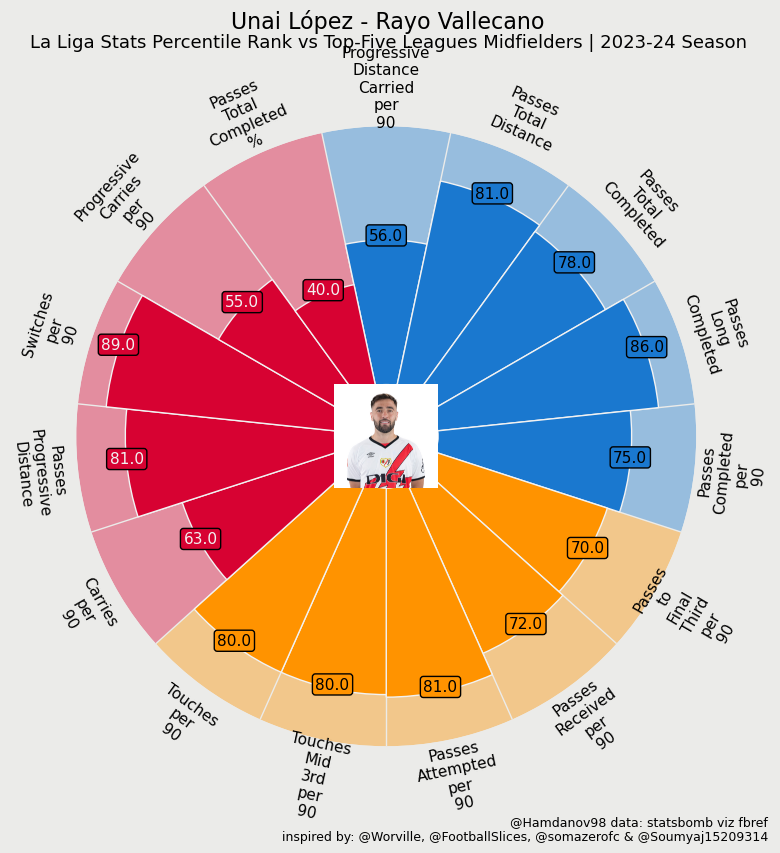

In [42]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    lopez_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Unai López - Rayo Vallecano", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Lopez_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png
